In [1]:
from fastai.vision import *
from fastai.metrics import accuracy, Recall
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 1033120000
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from tensorboardX import SummaryWriter
from trains import Task
task = Task.init(project_name = 'Valid ID Classify',
                task_name = 'Stage 2 - Mobile Net - fastai')

TRAINS Task: created new task id=6d009242d1c348c6a9acd7d6afc71902
2020-06-12 13:27:54,073 - trains.Task - INFO - No repository found, storing script code instead
TRAINS results page: http://139.180.222.253:8080/projects/e42c2d81b0e24d2ab5e3e4ac5bbf8972/experiments/6d009242d1c348c6a9acd7d6afc71902/output/log


In [2]:
data = ImageDataBunch.from_folder(path = 'data', train = 'Train', valid = 'Valid', size=224, bs=64, no_check = True
                                  ).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning:

The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 



In [3]:
import warnings
warnings.filterwarnings("ignore")

writer = SummaryWriter()

# save model class
class SaveBestModel(Recorder):
    def __init__(self, learn):
        super().__init__(learn)
        self.name = 0
        self.save_method = self.save_when_acc

    def save_when_acc(self, metrics):
        loss, accuracy, recall_0, precision_0, F1_0, recall_front, precision_front, F1_front, recall_back, precision_back, F1_back = float(metrics[0]), float(metrics[1]), float(metrics[2]), float(metrics[3]), float(metrics[4]), float(metrics[5]), float(metrics[6]), float(metrics[7]), float(metrics[8]), float(metrics[9]), float(metrics[10])
        writer.add_scalar('data_main/loss', loss, self.name)
        writer.add_scalar('data_main/accuracy', accuracy, self.name)
        writer.add_scalar('data_0/recall', recall_0, self.name)
        writer.add_scalar('data_0/precision', precision_0, self.name)
        writer.add_scalar('data_0/F1', F1_0, self.name)
        writer.add_scalar('data_front/recall', recall_front, self.name)
        writer.add_scalar('data_front/precision', precision_front, self.name)
        writer.add_scalar('data_front/F1', F1_front, self.name)
        writer.add_scalar('data_back/recall', recall_back, self.name)
        writer.add_scalar('data_back/precision', precision_back, self.name)
        writer.add_scalar('data_back/F1', F1_back, self.name)
        self.learn.save('fastai_v1_' + str(self.name))
        self.name += 1
            
    def on_epoch_end(self, last_metrics=MetricsList, **kwargs: Any):
        self.save_method(last_metrics)

In [13]:
learn = cnn_learner(data, models.mobilenet_v2, metrics= [accuracy, Recall(pos_label =0), Precision(pos_label =0), FBeta(pos_label =0), 
                                                         Recall(pos_label =2), Precision(pos_label =2), FBeta(pos_label =2),
                                                         Recall(pos_label =1), Precision(pos_label =1), FBeta(pos_label =1)], callback_fns = SaveBestModel)

2020-06-12 14:05:27,806 - trains.model - INFO - Selected model id: c45e2ee1aa78473aad02c22e7b18ac80


In [ ]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,recall,precision,f_beta,recall,precision,f_beta,recall,precision,f_beta,time
epoch,train_loss,valid_loss,accuracy,recall,precision,f_beta,recall,precision,f_beta,recall,precision,f_beta,time


TRAINS Monitor: Could not detect iteration reporting, falling back to iterations as seconds-from-start


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1)

In [14]:
learn.load('fastai_v1_1')
learn.unfreeze()
learn.lr_find()

2020-06-12 14:05:55,669 - trains.model - INFO - Selected model id: ac0c4a42a27d4ceeabea90694ac599c2
2020-06-12 14:05:56,338 - trains.Task - INFO - Task connect, second input model is not supported, adding into comment section
2020-06-12 14:05:57,064 - trains.frameworks - INFO - Found existing registered model id=88cdfd67c58a4de9af0dce80e84ec1ba [data/models/tmp.pth] reusing it.


epoch,train_loss,valid_loss,accuracy,recall,precision,f_beta,recall,precision,f_beta,recall,precision,f_beta,time
epoch,train_loss,valid_loss,accuracy,recall,precision,f_beta,recall,precision,f_beta,recall,precision,f_beta,time


2020-06-12 14:07:23,567 - trains.model - INFO - Selected model id: 88cdfd67c58a4de9af0dce80e84ec1ba
2020-06-12 14:07:24,039 - trains.Task - INFO - Task connect, second input model is not supported, adding into comment section
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


TypeError: float() argument must be a string or a number, not 'NoneType'

Min numerical gradient: 1.10E-06
Min loss divided by 10: 1.58E-05


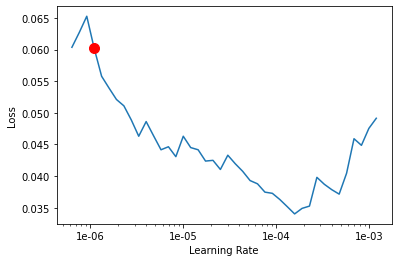

In [15]:
learn.recorder.plot(suggestion = True)

In [ ]:
learn.load
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))

In [10]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (25290 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,0,0
Path: data;

Valid: LabelList (2959 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,0,0
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): ConvBNReLU(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): ConvBNReLU(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 